In [1]:
from google.colab import drive
drive.mount('/content/drive')
! git clone https://github.com/Auazure/NYC-property-sale-data-analysis.git

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly&response_type=code

Enter your authorization code:
4/1AY0e-g5eFMJoGwretIiP1jP8C0n0yguw3xn0DVnQQokBYWoHshLRm5cgUGw


Mounted at /content/drive
Cloning into 'NYC-property-sale-data-analysis'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.


In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# reading data
bronx = pd.read_csv("/content/NYC-property-sale-data-analysis/rollingsales_bronx.csv",thousands=',')
brooklyn = pd.read_csv("/content/NYC-property-sale-data-analysis/rollingsales_brooklyn.csv",thousands=',')
manhattan = pd.read_csv("/content/NYC-property-sale-data-analysis/rollingsales_manhattan.csv",thousands=',')
queens = pd.read_csv("/content/NYC-property-sale-data-analysis/rollingsales_queens.csv",thousands=',')
statenisland = pd.read_csv("/content/NYC-property-sale-data-analysis/rollingsales_statenisland.csv",thousands=',')

df = pd.concat([manhattan, bronx, queens, brooklyn, statenisland], ignore_index=True)
print(df.shape)
df.columns = [c.replace(' ', '_') for c in df.columns]
df.dropna(how='all',inplace=True)
df.dropna(how='all',axis=1,inplace=True)
df.info()

In [ ]:
# 1=Manhattan; 2=Bronx; 3=Brooklyn; 4=Queens ; 5=Staten Island
df['BOROUGH'].unique()

array([1, 2, 4, 3, 5])

In [ ]:
df['SALE_PRICE'].describe()
len(df.loc[df['SALE_PRICE'] == 0])/len(df) #percentage of sale price=0

0.3261024844720497

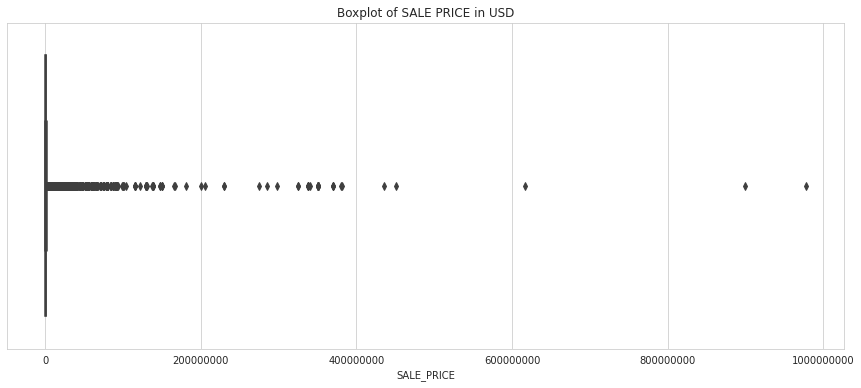

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['SALE_PRICE'])
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

**Deal with outlier**

In [ ]:
import matplotlib.ticker as ticker

plt.figure(figsize=(10,5))
plotd = sns.distplot(df[(df['SALE_PRICE']>100) & (df['SALE_PRICE'] < 5000000)]['SALE_PRICE'], kde=True, bins=100)

tick_spacing=250000 # set spacing for each tick
plotd.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plotd.set_xlim([-100000, 5000000]) # do not show negative values 
plt.xticks(rotation=30) # rotate x ticks by 30 degrees
plt.axvline(df[(df['SALE_PRICE']>100) & (df['SALE_PRICE'] < 5000000)]['SALE_PRICE'].mean(), c='red')
plt.axvline(df[(df['SALE_PRICE']>100) & (df['SALE_PRICE'] < 5000000)]['SALE_PRICE'].median(), c='blue')
plt.text(250000,0.0000012, "median")
plt.text(850000,0.0000010, "mean")
plt.ticklabel_format(style='plain', axis='x')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 32.953388
Kurtosis: 1667.143119


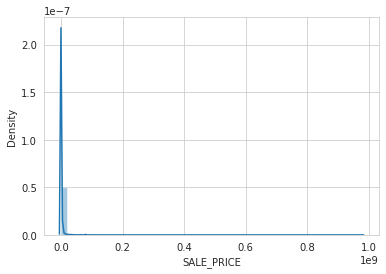

In [ ]:
df = df[df['SALE_PRICE'] != 0]
sns.distplot(df['SALE_PRICE'])
# Skewness and kurtosis
print("Skewness: %f" % df['SALE_PRICE'].skew())
print("Kurtosis: %f" % df['SALE_PRICE'].kurt())

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


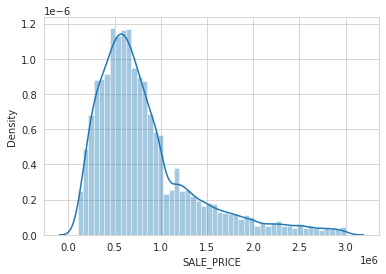

In [ ]:
df = df[(df['SALE_PRICE'] > 100000) & (df['SALE_PRICE'] < 3000000)]
sns.distplot(df['SALE_PRICE'])

Skewness: 1.565399
Kurtosis: 2.506170


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


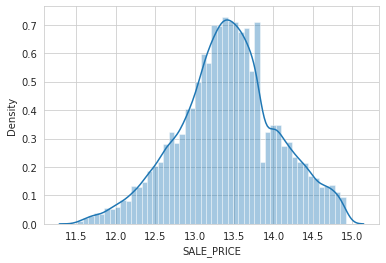

In [ ]:
# Skewness and kurtosis
print("Skewness: %f" % df['SALE_PRICE'].skew())
print("Kurtosis: %f" % df['SALE_PRICE'].kurt())
# log(1+x) transform
sns.distplot(np.log1p(df["SALE_PRICE"]))

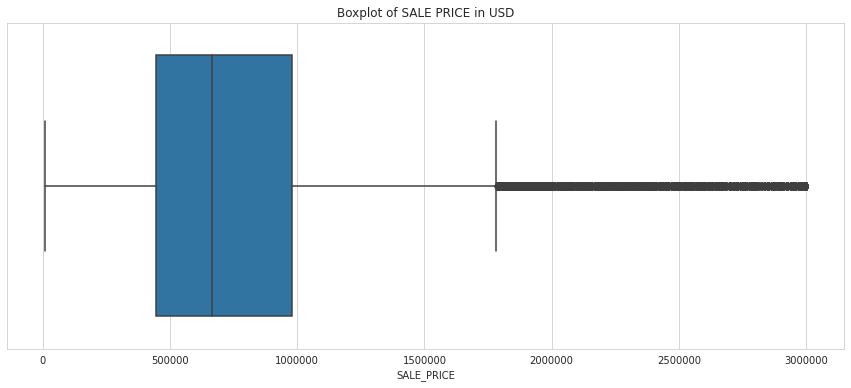

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['SALE_PRICE'])
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()